# C4021 - Group Project 2.3

### Problem Statement: Telecom Customer Churn Prediction

Classification Problem to predict the Telecom customer churn which is one of the major problem Telecom industry is facing today.


## Dataset Information

####   Source: https://www.kaggle.com/blastchar/telco-customer-churn 

#### Context: 
"Predict behavior to retain customers. Analyze all the relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

#### Content: 
Each row represents a customer, each column contains customers attributes described on the column Metadata.

##### The data set includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

## Team Contributions:

#### Training data
#### Pre-processing
#### Algorithm training and evaluation
#### Visualization of outputs

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

# Visualization and plotting
import matplotlib.pyplot as plt

# Data Pre-processing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Model training, cross-validation and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, r2_score, accuracy_score

# Data Set
### Load the CSV file into Pandas dataframe

In [2]:
dataframe = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# Features available in the dataset
dataframe.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [4]:
# Lets see the how many Churn values are present per category
# We can see that its a Binary classification problem as there are 2 outcomes.

dataframe.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Basic data exploration of the input Dataframe

In [5]:
# Check the data dimension
dataframe.shape

(7043, 21)

In [6]:
# Print the first 5 rows of the dataframe to get a feel for the data
dataframe.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Lets have a look into the numeric features
dataframe.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# Lets have a look into the categorical features
dataframe.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,0851-DFJKB,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


### Analyze and plot the features with customer Churn to find Correlation between features
Lets analyze the feature correlations by pivoting features against each other

In [9]:
dataframe.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Data has the following feature categories

#### Demographic info about customers 
    – gender, senior citizen, and family members (if customers have partners and dependents)
    
####  Services that each customer has signed up for 
    – phone service, multiple lines, internet, online security, online backup, device protection, tech support, streaming TV and movies

#### Customer account information 
    – Tenure, contract, payment method, paperless billing, monthly charges, and total charges


In [10]:
# Plot histograms to show distribution of features by outcome categories (Depy2016)

def plot_histogram_dv(x,y):

    plt.hist(list(x[y=="No"]), alpha=0.5, facecolor='blue', label='Churn=0')
    plt.hist(list(x[y=="Yes"]), alpha=0.75, facecolor='green', label='Churn=1')
    plt.title("Histogram of '{var_name}' by Customer Churn".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

##### Churn rate Analysis on Demographic Info of Customers

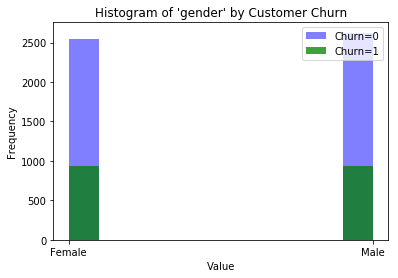

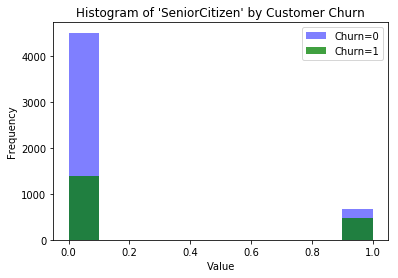

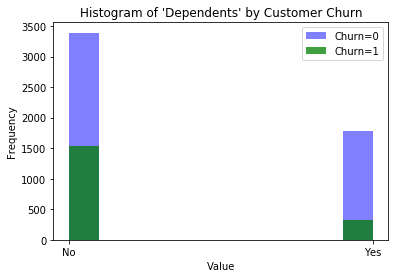

In [11]:
demographic_info = ['gender', 'SeniorCitizen', 'Dependents']

# Churn by Demographic data: 
for demo in demographic_info:
    plot_histogram_dv(dataframe[demo], dataframe.Churn) ## need to use barplots here

#### Observations:
- Gender doesn't show much info on Churn rate
- Senior Citizen are less likely to Churn
- Dependents are less likely to Churn

##### Churn rate Analysis on Services used by Customers

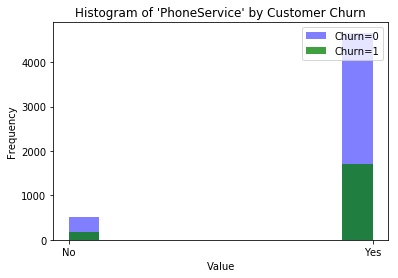

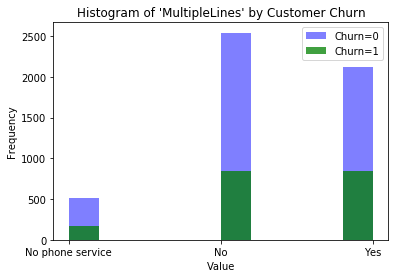

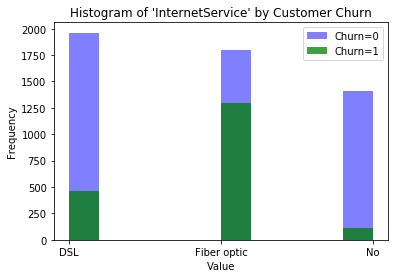

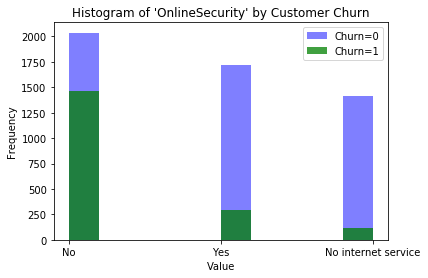

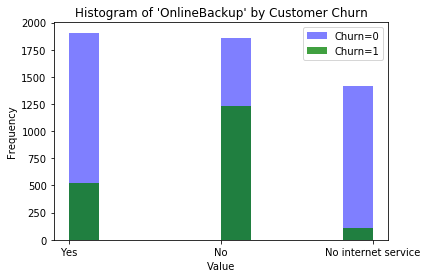

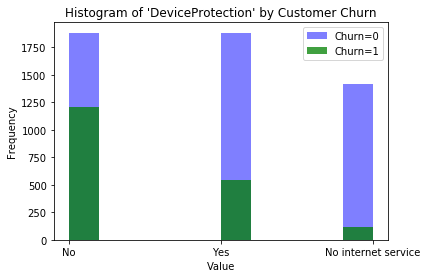

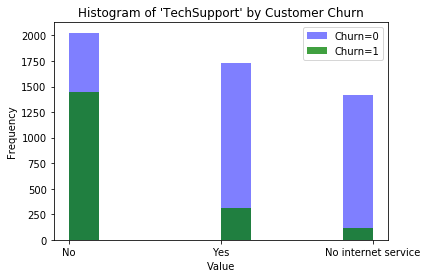

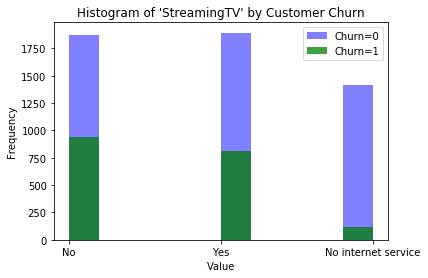

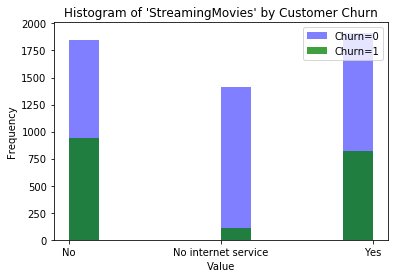

In [12]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Churn by Services: 
for service in services:
    plot_histogram_dv(dataframe[service], dataframe.Churn)

#### Observations:
- Customers using Phone services Churn more
- Multiple Lines has no significant effect on customer Churn
- Customers using Internet Service with Fiber Optics has high Churn
- Customers without Online security has high Churn
- Online Backup has so significant impact on Churn
- Customers without Device Protection has high Churn
- Customers without Tech Support has high Churn
- Steaming TV and movies has so no definite impact on Churn


##### Churn rate Analysis on the Account Information

In [13]:
account_info = ['tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']

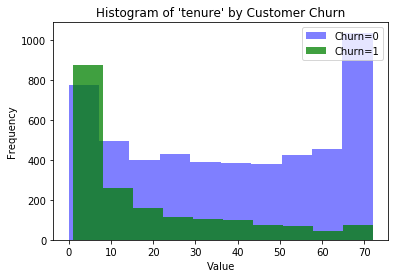

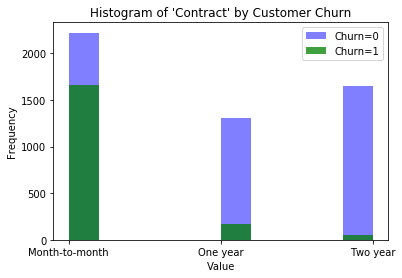

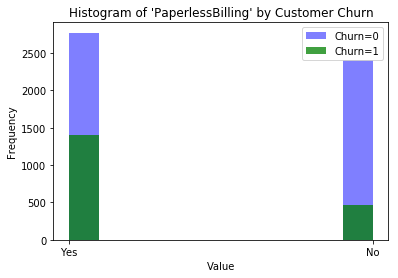

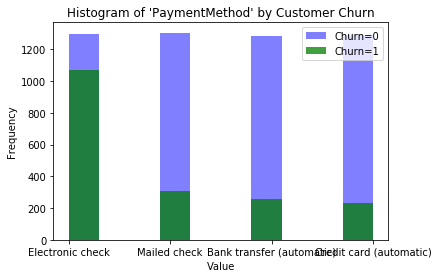

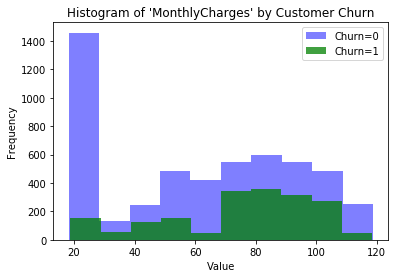

In [14]:
for info in account_info:
    plot_histogram_dv(dataframe[info], dataframe.Churn)


#### Observations:
- Customer with short term Tenure has High Churn 
- Customer with month to month contract Churn a lot (Telecom company need long term plan) 
- Paperless Billing opting customers has high Churn rate
- Customers with monthly charge sin the range of 70-110 has High Churn rate

# Data-Preprocessing

#### Which features are categorical?
- Categorical features: gender, Partner, Dependents, SeniorCitizen, PhoneService, PaperlessBilling, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod  

#### Which features are numerical?
- Continous: Tenure, MonthlyCharges, TotalCharges

In [15]:
# Checking the data types and counts of all the columns
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

#### The Total Charges is shown as a string and not a numeric number. Lets do some investigation and fix that

In [16]:
# The Total Charges sections has some empty spaces/blank sections
dataframe.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [17]:
# Lets convert the TotalCharges to numerical data type. 
# errors='coerce' will convert the invalid parsed data as NaN

dataframe.TotalCharges = pd.to_numeric(dataframe.TotalCharges, errors='coerce')
dataframe.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

### Basic data cleaning process

As per Depy2016 lesson, lets do some data cleaning

#### Dealing with data types
- Models can only handle numeric features
- Categorical and ordinal features must be converted into numeric features
    - Transform a categorical feature into a set of dummy features, each representing a unique category
    - In the set of dummy features, 1 indicates that the observation belongs to that category

In [18]:
# Find the categorical variables in the dataset 
# (Code is inspired from the Depy2016 tutorial: https://github.com/aprilypchen/depy2016/blob/master/DePy_Talk.ipynb)

for col_name in dataframe.columns:
    if dataframe[col_name].dtypes == 'object':
        unique_cat = len(dataframe[col_name].unique())
        print("Feature '{}' has {} unique categories".format(col_name, unique_cat))

Feature 'customerID' has 7043 unique categories
Feature 'gender' has 2 unique categories
Feature 'Partner' has 2 unique categories
Feature 'Dependents' has 2 unique categories
Feature 'PhoneService' has 2 unique categories
Feature 'MultipleLines' has 3 unique categories
Feature 'InternetService' has 3 unique categories
Feature 'OnlineSecurity' has 3 unique categories
Feature 'OnlineBackup' has 3 unique categories
Feature 'DeviceProtection' has 3 unique categories
Feature 'TechSupport' has 3 unique categories
Feature 'StreamingTV' has 3 unique categories
Feature 'StreamingMovies' has 3 unique categories
Feature 'Contract' has 3 unique categories
Feature 'PaperlessBilling' has 2 unique categories
Feature 'PaymentMethod' has 4 unique categories
Feature 'Churn' has 2 unique categories


In [19]:
# Assign outcome as 0 if columns has value "No" and as 1 if calumn value is "Yes"

columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    dataframe[item] = [1 if each == 'Yes' else 0 for each in dataframe[item]]

dataframe.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [20]:
# Customer ID doesn't show any meaningful info as its unique per customer and can be dropped from the data set

dataframe.drop(["customerID"], axis=1, inplace=True)

In [21]:
# Group Tenure into a categorical column

# if (dataframe["tenure"]) <= 12:
#     dataframe.tenure = 0
# elif (dataframe["tenure"] > 12) & (dataframe["tenure"] <= 24):
#     dataframe.tenure = 1
# elif (dataframe["tenure"] > 24) & (dataframe["tenure"] <= 48) :
#     dataframe.tenure = 2
# elif (dataframe["tenure"] > 48) & (dataframe["tenure"] <= 60) :
#     dataframe.tenure = 3
# elif dataframe["tenure"] > 60 :
#     dataframe.tenure = 4
    
# dataframe.head()

In [22]:
# Let's convert all the categorical variables into dummy variables
# We will be using this dataframe going forward

dataframe_dummies = pd.get_dummies(dataframe)
dataframe_dummies.head(5)

# Number of Colmuns have doubled now from 21 to 42 now

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,1,...,1,0,0,1,0,0,0,0,1,0


In [23]:
# Check if there are any strong correlation between data

dataframe_dummies.corr()["Churn"].sort_values(ascending=False)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling                           0.191825
SeniorCitizen                              0.150889
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService                               0.011942
gender_Female                              0.008612
gender_Male                               -0.008612
MultipleLine

#### Handling missing data
- Models can not handle missing data
- Solution:
    1. Remove observations/features that have missing data
- OR
    2. Use imputation
    

In [24]:
# Check for missing values

dataframe_dummies.isnull().sum().sort_values(ascending=False).head()

TotalCharges                          11
PaymentMethod_Mailed check             0
gender_Male                            0
OnlineSecurity_No internet service     0
OnlineSecurity_No                      0
dtype: int64

There are 11 missing values for Total Charges. 
- Since its a small proportion of the total number of input samples, we can remove these 11 rows from our data set.
- Or Impute the missing values with some strategy, like mean, median, highest frequency value of given feature, etc

In [25]:
# Drop rows with missing values for Total Charges
#dataframe.dropna(axis=0, inplace = True)
#dataframe.shape


In [26]:
# Completing missing data
# The data in each column is taken and the gaps in that column are written. Thus, the missing data has been completed.

imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

missingData = dataframe_dummies.iloc[:,0:].values
imputer = imputer.fit(missingData)

completedData = imputer.transform(missingData)

dataframe_dummies.iloc[:, 0:] = completedData
dataframe_dummies.shape

(7043, 42)

In [27]:
# Re-Check is any missing values are still there
dataframe_dummies.isnull().sum().sort_values(ascending=False).head(3)

PaymentMethod_Mailed check            0
gender_Male                           0
OnlineSecurity_No internet service    0
dtype: int64

# Algorithm Training and Evaluation

#### Split the dataframe into Features and Labels

In [28]:
# Assign X as a DataFrame of features and Drop the Customer Churn (outcome)
X = dataframe_dummies.drop("Churn", axis=1)

# Assign the y as a Series of the outcome variable
y = dataframe_dummies["Churn"]

In [29]:
X.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Female,gender_Male,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.300441,0.495244,0.504756,...,0.395428,0.216669,0.387903,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2265.000258,0.500013,0.500013,...,0.488977,0.412004,0.487307,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,402.225000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1400.550000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Scaling the data

In [30]:
# Scaling all the variables to a range of 0 to 1


features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Female,gender_Male,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.013889,0.0,1.0,0.115423,0.001275,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.472222,1.0,0.0,0.385075,0.215867,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.027778,1.0,1.0,0.354229,0.010310,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.625000,0.0,0.0,0.239303,0.210241,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.027778,1.0,1.0,0.521891,0.015330,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
# Use PCA from sklearn.decompostion to find principal components

# pca = PCA(n_components=5)
# pca_fit = pca.fit_transform(X)
# X_pca = pd.DataFrame(pca_fit)

# print(pca.explained_variance_ratio_)

In [32]:
# Use train_test_split in sklearn.
# cross_validation to split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle= True, random_state=42)

# The total number of features have grown substantially after dummying and adding interaction terms
print(dataframe.shape)
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(7043, 20)
(7043, 41)
(5634, 41)
(1409, 41)
(5634,)
(1409,)


In [34]:
def test_evaluate_SVM(X_train, y_train, X_test, y_test):
    model_svc = SVC() 
    # Fit model
    model_svc.fit(X_train, y_train)
    # Make predictions on test data
    pred_test = model_svc.predict(X_test)

    # Test accuracy
    print(metrics.accuracy_score(y_test, pred_test))

    # Cross validation score
    #scores = cross_val_score(model_svc, X_train, y_train, cv=5)
    #print(scores)

    # Create the Confusion matrix    
    #print(confusion_matrix(y_test,pred_test)) 

In [35]:
test_evaluate_SVM(X_train, y_train, X_test, y_test)

0.8218594748048261
